# Capstone Webscrapping using BeautifulSoup
This notebook contains guidances & tasks on the data processing for the application

## Background
<p>In this project, we will collect Ethereum trading data from <a href='https://www.coingecko.com'>www.coingecko.com</a>. Data taken daily, includes market capitalization, trading volume, opening price, and closing price. From the existing data, we will create plot of trading volume to find out the trendline of ethereum trade.
<p>Some libraries that will be used in this project is: <code>requests</code> to establish a connection with source web, <code>BeatifulSoup</code> to scrapping, and <code>Pandas</code> to create and process dataframes.

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
# Import requests library
import requests

# Make request to url to be scraped
url_get = requests.get('https://www.coingecko.com/en/coins/ethereum/historical_data/usd?start_date=2020-01-01&end_date=2021-06-30#panel')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[:500]

b'<!DOCTYPE html>\n<html lang="en">\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<script>window.NREUM||(NREUM={});NREUM.info={"beacon":"bam-cell.nr-data.net","errorBeacon":"bam-cell.nr-data.net","licenseKey":"cd4a6493ab","applicationID":"83495717","transactionName":"dV5dRBNcDlkEEU5SDF9fQB8JWhFBDhEIUgJabldRFVI=","queueTime":0,"applicationTime":221,"agent":""}</script>\n<script>(window.NREUM||(NREUM={})).loader_config={xpid:"VQ4EVVBUCBAIV1VbAgYGUQ==",licenseKey:"'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
# Import BeautifulSoup library
from bs4 import BeautifulSoup 

# Parse data from url
soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [4]:
table = soup.find('tbody')
print(table.prettify()[:500])

<tbody>
 <tr>
  <th class="font-semibold text-center" scope="row">
   2021-06-30
  </th>
  <td class="text-center">
   $253,607,549,372
  </td>
  <td class="text-center">
   $27,149,143,847
  </td>
  <td class="text-center">
   $2,169.40
  </td>
  <td class="text-center">
   N/A
  </td>
 </tr>
 <tr>
  <th class="font-semibold text-center" scope="row">
   2021-06-29
  </th>
  <td class="text-center">
   $243,040,539,437
  </td>
  <td class="text-center">
   $30,629,329,806
  </td>
  <td class="te


Do the scrapping process here (please change this markdown with your explanation)

In [5]:
items = table.find_all('tr')

# Initiating a tuple as container
temp = []

for i in range(0, len(items)):
    
    # Scrapping process
    item = items[i]
    date = item.find('th').text.strip()
    market_cap = item.find_all('td')[0].text.strip().replace('$', '').replace(',','')
    volume = item.find_all('td')[1].text.strip().replace('$', '').replace(',','')
    open = item.find_all('td')[2].text.strip().replace('$', '').replace(',','')
    close = item.find_all('td')[3].text.strip().replace('$', '').replace(',','')
    
    # Store every data in temp
    temp.append((date, market_cap, volume, open, close)) 

In [6]:
# Validate temp

# temp[:5]
temp[-5:]

[('2020-01-05', '14636213160', '6958393690', '134.14', '135.01'),
 ('2020-01-04', '14613194776', '9655245100', '133.70', '134.14'),
 ('2020-01-03', '13859793330', '6497297884', '127.05', '133.70'),
 ('2020-01-02', '14230588104', '6623732041', '130.48', '127.05'),
 ('2020-01-01', '14097451632', '7103187151', '129.19', '130.48')]

Since we know that 'Date' is ordered in ascending, we want to change the order to descending to make it easier to understand

In [7]:
temp = temp[::-1]

## Creating data frame & Data wrangling

Put the array into dataframe

In [32]:
# Import pandas library
import pandas as pd

# Create dataframe from temp
df = pd.DataFrame(temp, columns=('Date', 'Market Cap', 'Volume', 'Open', 'Close'))

In [33]:
# Validate dataframe

# df.head()
df.tail()

,Date,Market Cap,Volume,Open,Close
542,2021-06-26,213871849532,25981381067,1833.46,1817.05
543,2021-06-27,209989265221,24249510321,1817.05,1973.93
544,2021-06-28,229354016311,24316408028,1973.93,2087.52
545,2021-06-29,243040539437,30629329806,2087.52,2169.40
546,2021-06-30,253607549372,27149143847,2169.40,N/A


Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

Check 'N/A' value in df

In [34]:
df.isna().sum()

Date          0
Market Cap    0
Volume        0
Open          0
Close         0
dtype: int64

We already know that first data in 'Open' is 'N/A', but while we check with <code>isna().sum()</code> there is no <code>'N/A'</code> value. This means, 'N/A' here is not <code>N/A</code> value, but <code>str</code> value. So we need to change every 'N/A' with 0 (null).

In [35]:
df.replace({'N/A':int('0')}, inplace=True)

Check data type for each columns

In [36]:
df.dtypes

Date          object
Market Cap    object
Volume        object
Open          object
Close         object
dtype: object

Currently, the type of all columns is <code>object</code>. We must change the data type accordingly, 'Date' must <code>datetime64</code> and others must <code>float64</code>

In [37]:
df['Date'] = df['Date'].astype('datetime64')
df[['Market Cap', 'Volume', 'Open', 'Close']] = df[['Market Cap', 'Volume', 'Open', 'Close']].astype('float')
df.dtypes

Date          datetime64[ns]
Market Cap           float64
Volume               float64
Open                 float64
Close                float64
dtype: object

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

Data visualisation (please change this markdown with your explanation of what you do for data wrangling)

Since we want to visualize the movement of 'Volume' over time, we need to set 'Date' as index

In [38]:
df = df.set_index('Date')

Visualize 'Volume' movement in line graph

<AxesSubplot:xlabel='Date'>

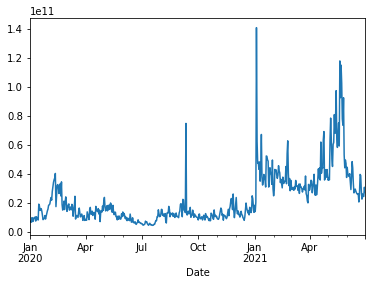

In [39]:
df['Volume'].plot.line()

In [40]:
df.describe()

,Market Cap,Volume,Open,Close
count,5.470000e+02,5.470000e+02,547.000000,547.000000
mean,1.018994e+11,2.244515e+10,888.237367,888.001188
std,1.081609e+11,1.812490e+10,930.603914,930.813277
min,1.195663e+10,4.344880e+09,110.600000,0.000000
25%,2.522716e+10,1.040704e+10,227.845000,227.845000
50%,4.369277e+10,1.503386e+10,387.720000,387.720000
75%,1.824718e+11,3.094427e+10,1580.530000,1580.530000
max,4.813810e+11,1.409065e+11,4182.790000,4182.790000


In [41]:
df[df['Volume'] == df['Volume'].min()]

,Market Cap,Volume,Open,Close
Date,,,,
2020-07-18,2.601517e+10,4.344880e+09,232.78,235.68


In [42]:
df[df['Volume'] == df['Volume'].max()]

,Market Cap,Volume,Open,Close
Date,,,,
2021-01-04,1.125254e+11,1.409065e+11,967.0,1025.65


In [43]:
df = df.reset_index()
df['Year'] = df['Date'].dt.to_period('Y')
df.groupby(by='Year')['Volume'].sum()

Year
2020    4.755115e+12
2021    7.522383e+12
Freq: A-DEC, Name: Volume, dtype: float64

**Analysis**
<p>Generally Ethereum trading volume is increased in 2021 compared to 2020, there khown from the amount of trading volume. Throughout 2020, total amounts of volume trading is 4.755 trillion, while in 2021, just until July, total amounts of volume trading is 7.495 trillion.  In the period February 2020-July 2020, the trade volume Ethereum generally decreased until reached its lowest point in 18th July 2020 at $4.34 billion. Trading volume increased again at August 2020. Trading volume reached its highest point in 4nd January 2021 at $140.9 billion, after that trading volume decreased again until April 2021, then increased again until May 2021, lastly decreased again until July 2021. Average trading volume are $22.43 billion

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.